In [9]:
%matplotlib inline

In [10]:
import networkx as nx

In [11]:
import matplotlib.pyplot as plt

In [12]:
G = nx.petersen_graph()

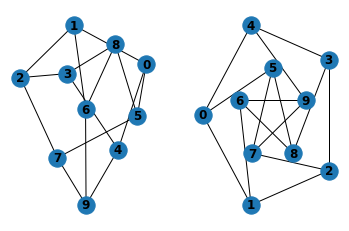

In [13]:
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

# Pathpy

In [17]:
import pathpy as pp
import pandas as pd

In [15]:
n = pp.Network(directed=True)
n.add_edge('a', 'c')
n.add_edge('b', 'c')
n.add_edge('c', 'd')
n.add_edge('c', 'e')
print(n)

Directed network
Nodes:				5
Links:				4



In [19]:
df = pd.read_csv('../data/processed/test_edges_timestamped.csv')

In [29]:
import csv
edges = []
with open('../data/processed/test_edges_timestamped.csv') as infile:
    reader = csv.reader(infile)
    next(reader, None)  # skip the headers
    for row in reader:
        edges.append(row)

In [21]:
edges

[['Abel', 'Louise', '1'],
 ['Frøken Jensen', 'Louise', '1'],
 ['Frøken Jensen', 'Ida-Yngst', '1'],
 ['Abel', 'Ida-Yngst', '1'],
 ['Abel', 'Louise', '1'],
 ['Ida-Yngst', 'Louise', '1'],
 ['Ida-Yngst', 'Louise', '1'],
 ['Ida-Yngst', 'Louise-Ældst', '4'],
 ['Frøken Jensen', 'Louise-Ældst', '4'],
 ['Frøken Jensen', 'Kiærs', '4'],
 ['Kiær', 'Kiærs', '4'],
 ['Kiær', 'Madsen', '4'],
 ['Kiær', 'Madsen', '4'],
 ['Kiær', 'Louise-Ældst', '4'],
 ['Bai', 'Louise-Ældst', '4'],
 ['Bai', 'Gud', '4'],
 ['Frøken Jensen', 'Gud', '4'],
 ['Frøken Jensen', 'Gud', '6'],
 ['Gud', 'Ida Abel', '6'],
 ['Ida Abel', 'Ida-Yngst', '6'],
 ['Ida-Yngst', 'Mi', '6'],
 ['Ida-Yngst', 'Mi', '6'],
 ['Ida-Yngst', 'Louise', '6'],
 ['Louise', 'Madsen', '6'],
 ['Hr. Kiær', 'Madsen', '6'],
 ['Gud', 'Hr. Kiær', '6'],
 ['Bai', 'Gud', '6']]

In [184]:
edges = []
memory = []
def clean(text):
    return text.replace(' ', '-')

with open('../data/processed/bang_ved_vejen_edges_timestamped.csv') as infile:
#with open('../data/processed/test_edges_timestamped.csv') as infile:
    reader = csv.reader(infile)
    next(reader, None)  # skip the headers
    for i, row in enumerate(reader):
        if row[0][0] == '-' or row[1][0] == '-':
            continue
        if row not in memory:
            memory.append(row)
            edges.append((clean(row[0]), clean(row[1]), int(row[2])))

In [185]:
print(len(edges))


774


In [186]:
edges

[('Abel', 'Louise', 1),
 ('Frøken-Jensen', 'Louise', 1),
 ('Frøken-Jensen', 'Ida-Yngst', 1),
 ('Abel', 'Ida-Yngst', 1),
 ('Ida-Yngst', 'Louise', 1),
 ('Ida-Yngst', 'Louise-Ældst', 4),
 ('Frøken-Jensen', 'Louise-Ældst', 4),
 ('Frøken-Jensen', 'Kiærs', 4),
 ('Kiær', 'Kiærs', 4),
 ('Kiær', 'Madsen', 4),
 ('Kiær', 'Louise-Ældst', 4),
 ('Bai', 'Louise-Ældst', 4),
 ('Bai', 'Gud', 4),
 ('Frøken-Jensen', 'Gud', 4),
 ('Frøken-Jensen', 'Gud', 6),
 ('Gud', 'Ida-Abel', 6),
 ('Ida-Abel', 'Ida-Yngst', 6),
 ('Ida-Yngst', 'Mi', 6),
 ('Ida-Yngst', 'Louise', 6),
 ('Louise', 'Madsen', 6),
 ('Hr.-Kiær', 'Madsen', 6),
 ('Gud', 'Hr.-Kiær', 6),
 ('Bai', 'Gud', 6),
 ('Bai', 'Hr.-Huus', 9),
 ('Bai', 'Louise-Ældst', 9),
 ('Ida-Yngst', 'Louise-Ældst', 9),
 ('Gud', 'Ida-Yngst', 9),
 ('Bai', 'Gud', 9),
 ('Bai', 'Hr.-Bai', 9),
 ('Hr.-Bai', 'Kiær', 9),
 ('Frøken-Jensen', 'Kiær', 9),
 ('Frøken-Jensen', 'Nette', 9),
 ('Ida-Yngst', 'Kiær', 12),
 ('Andersen', 'Kiær', 12),
 ('Abel', 'Andersen', 12),
 ('Frøken-Jensen', 'L

In [205]:
tvv = pp.TemporalNetwork()
for source, target, time in edges:
    tvv.add_edge(source, target, int(time))

In [206]:
print(tvv)

Nodes:			151
Time-stamped links:	774
Links/Nodes:		5.125827814569536
Observation period:	[1, 367]
Observation length:	 366 
Time stamps:		 124 
Avg. inter-event dt:	 2.975609756097561
Min/Max inter-event dt:	 2/6


In [207]:
style = {    
  'ts_per_frame': 1, 
  'ms_per_frame': 500,
  'look_ahead': 10, 
  'look_behind': 10, 
  'node_size': 15, 
  'inactive_edge_width': 2,
  'active_edge_width': 4, 
  'label_color' : 'black',
  'label_size' : '24px',
  'label_offset': [0,5]
  }
pp.visualisation.plot(tvv, **style)

In [96]:
t = pp.TemporalNetwork()
t.add_edge('a', 'b', 1)
t.add_edge('b', 'a', 3)
t.add_edge('b', 'c', 3)
t.add_edge('d', 'c', 4)
t.add_edge('c', 'd', 5)
t.add_edge('c', 'b', 6)
print(t)

Nodes:			4
Time-stamped links:	6
Links/Nodes:		1.5
Observation period:	[1, 6]
Observation length:	 5 
Time stamps:		 5 
Avg. inter-event dt:	 1.25
Min/Max inter-event dt:	 1/2


In [97]:
t

In [168]:
tt = pp.TemporalNetwork()
tt.add_edge('Abel', 'Ida-Yngst', 1)
tt.add_edge('Abel', 'Louise', 1)
tt.add_edge('Ida-Yngst', 'Louise', 2)
tt.add_edge('Ida-Yngst', 'Katinka', 3)
tt.add_edge('Bai', 'Katinka', 4)
tt.add_edge('Bai', 'Katinka', 5)
tt.add_edge('Abel', 'Louise', 1)
tt.add_edge('Frøken Jensen', 'Louise', 2)
tt.add_edge('Frøken Jensen', 'Ida-Yngst', 3)
tt.add_edge('Abel', 'Ida-Yngst', 4)
tt.add_edge('Abel', 'Louise', 5)
tt.add_edge('Ida-Yngst', 'Louise', 6)
tt.add_edge('Ida-Yngst', 'Louise', 7)
tt.add_edge('Ida-Yngst', 'Louise-Ældst', 8)
tt.add_edge('Frøken Jensen', 'Louise-Ældst', 9)
tt.add_edge('Frøken Jensen', 'Kiærs', 10)
tt.add_edge('Kiær', 'Kiærs', 11)
tt.add_edge('Kiær', 'Madsen', 12)
tt.add_edge('Kiær', 'Madsen', 13)
tt.add_edge('Kiær', 'Louise-Ældst', 14)
tt.add_edge('Bai', 'Louise-Ældst', 15)
tt.add_edge('Bai', 'Gud', 16)
tt.add_edge('Frøken Jensen', 'Gud', 17)
tt.add_edge('Frøken Jensen', 'Gud', 18)
tt.add_edge('Gud', 'Ida Abel', 19)
tt.add_edge('Ida Abel', 'Ida-Yngst', 20)
tt.add_edge('Ida-Yngst', 'Mi', 21)
tt.add_edge('Ida-Yngst', 'Mi', 22)
tt.add_edge('Ida-Yngst', 'Louise', 23)
tt.add_edge('Louise', 'Madsen', 24)
tt.add_edge('Ida-Yngst', 'Louise', 23)
tt.add_edge('Louise', 'Madsen', 24)
tt.add_edge('Gud', 'HrK', 25)
tt.add_edge('Bai', 'Gud', 27)

In [169]:
print(tt)


Nodes:			14
Time-stamped links:	34
Links/Nodes:		2.4285714285714284
Observation period:	[1, 27]
Observation length:	 26 
Time stamps:		 26 
Avg. inter-event dt:	 1.04
Min/Max inter-event dt:	 1/2


In [170]:
tt
